# Entrenamiento Q-Learning (Notebook)

Prueba rápida del flujo manual descrito en el Manifiesto: entorno Gymnasium + agente de `mlvlab` + bucle de entrenamiento explícito.

Iniciando entrenamiento...
Episodio 250: Recompensa Total = 86.0
Episodio 500: Recompensa Total = -121.0
Episodio 750: Recompensa Total = 93.0
Episodio 1000: Recompensa Total = 94.0
Episodio 1250: Recompensa Total = 93.0
Episodio 1500: Recompensa Total = 90.0
Episodio 1750: Recompensa Total = -2.0
Episodio 2000: Recompensa Total = 92.0
Episodio 2250: Recompensa Total = 88.0
Episodio 2500: Recompensa Total = 99.0
Entrenamiento finalizado.


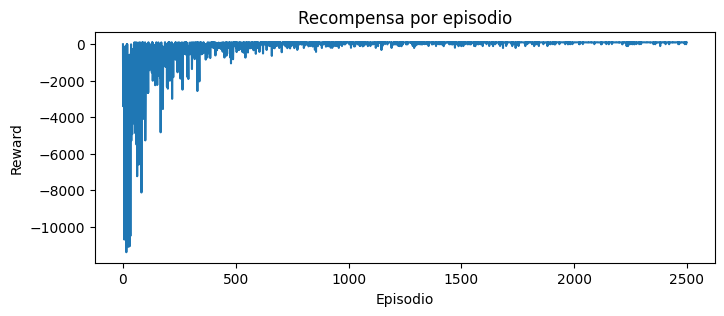

In [1]:
import gymnasium as gym
from mlvlab.agents.q_learning import QLearningAgent

# 1) Crear entorno base
env = gym.make("mlv/ant-v1")
GRID_SIZE = env.unwrapped.GRID_SIZE

# Adaptador manual
def obs_to_state(obs, grid_size):
    return int(obs[1]) * int(grid_size) + int(obs[0])

# 2) Crear agente
agent = QLearningAgent(
    observation_space=gym.spaces.Discrete(GRID_SIZE * GRID_SIZE),
    action_space=env.action_space,
    learning_rate=0.1,
    discount_factor=0.99,
)

# 3) Bucle de entrenamiento manual
num_episodes = 2500
print("Iniciando entrenamiento...")

rewards = []
for episode in range(num_episodes):
    obs, info = env.reset()
    state = obs_to_state(obs, GRID_SIZE)

    done = False
    total_reward = 0.0
    while not done:
        action = agent.act(state)
        next_obs, reward, terminated, truncated, info = env.step(action)
        next_state = obs_to_state(next_obs, GRID_SIZE)

        agent.learn(state, action, reward, next_state, terminated or truncated)
        state = next_state
        total_reward += reward
        done = terminated or truncated

    rewards.append(total_reward)
    if (episode + 1) % 250 == 0:
        print(f"Episodio {episode + 1}: Recompensa Total = {total_reward}")

print("Entrenamiento finalizado.")
env.close()

import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))
plt.plot(rewards)
plt.title("Recompensa por episodio")
plt.xlabel("Episodio")
plt.ylabel("Reward")
plt.show()

Iniciando entrenamiento...
Episodio 250: Recompensa Total = -785.0
Episodio 500: Recompensa Total = -14.0
Episodio 750: Recompensa Total = -12.0
Episodio 1000: Recompensa Total = -24.0
Episodio 1250: Recompensa Total = 89.0
Episodio 1500: Recompensa Total = 99.0
Episodio 1750: Recompensa Total = 94.0
Episodio 2000: Recompensa Total = 94.0
Episodio 2250: Recompensa Total = 99.0
Episodio 2500: Recompensa Total = 94.0
Entrenamiento finalizado.


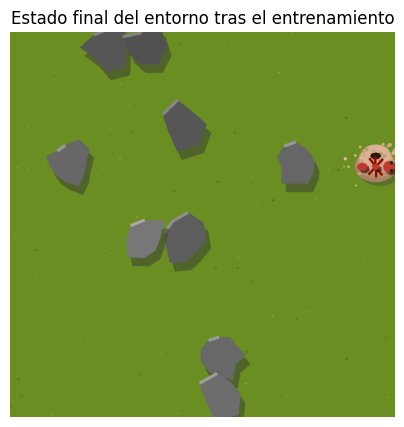

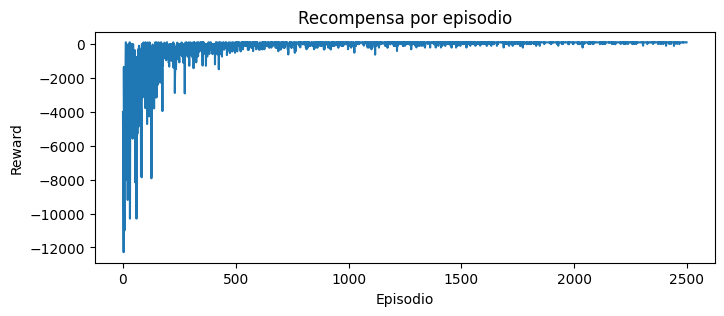

In [26]:
import gymnasium as gym
from mlvlab.agents.q_learning import QLearningAgent
import matplotlib.pyplot as plt ### Mover el import aquí para usarlo antes

# 1) Crear entorno base
### CAMBIO: Añadir render_mode para poder capturar la imagen
env = gym.make("mlv/ant-v1", render_mode="rgb_array") 
GRID_SIZE = env.unwrapped.GRID_SIZE

# Adaptador manual
def obs_to_state(obs, grid_size):
    return int(obs[1]) * int(grid_size) + int(obs[0])

# 2) Crear agente
agent = QLearningAgent(
    observation_space=gym.spaces.Discrete(GRID_SIZE * GRID_SIZE),
    action_space=env.action_space,
    learning_rate=0.1,
    discount_factor=0.99,
)

# 3) Bucle de entrenamiento manual
num_episodes = 2500
print("Iniciando entrenamiento...")

rewards = []
last_frame = None ### NUEVO: Variable para guardar la última imagen
for episode in range(num_episodes):
    obs, info = env.reset()
    state = obs_to_state(obs, GRID_SIZE)

    done = False
    total_reward = 0.0
    while not done:
        action = agent.act(state)
        next_obs, reward, terminated, truncated, info = env.step(action)
        next_state = obs_to_state(next_obs, GRID_SIZE)

        agent.learn(state, action, reward, next_state, terminated or truncated)
        state = next_state
        total_reward += reward
        done = terminated or truncated

    rewards.append(total_reward)
    if (episode + 1) % 250 == 0:
        print(f"Episodio {episode + 1}: Recompensa Total = {total_reward}")

### NUEVO: Capturar la imagen del entorno al final del último episodio
last_frame = env.render()

print("Entrenamiento finalizado.")
env.close()

### NUEVO: Mostrar la imagen capturada
if last_frame is not None:
    plt.figure(figsize=(5, 5))
    plt.imshow(last_frame)
    plt.title("Estado final del entorno tras el entrenamiento")
    plt.axis('off') # Para que no se vean los ejes
    plt.show()

# Mostrar el gráfico de recompensas como antes
plt.figure(figsize=(8,3))
plt.plot(rewards)
plt.title("Recompensa por episodio")
plt.xlabel("Episodio")
plt.ylabel("Reward")
plt.show()

Iniciando entrenamiento...
Episodio 100: Recompensa Total = -450.0
Episodio 200: Recompensa Total = -137.0
Episodio 300: Recompensa Total = 91.0
Episodio 400: Recompensa Total = -2.0
Episodio 500: Recompensa Total = 96.0
Entrenamiento finalizado y vídeos guardados en la carpeta 'videos/'.


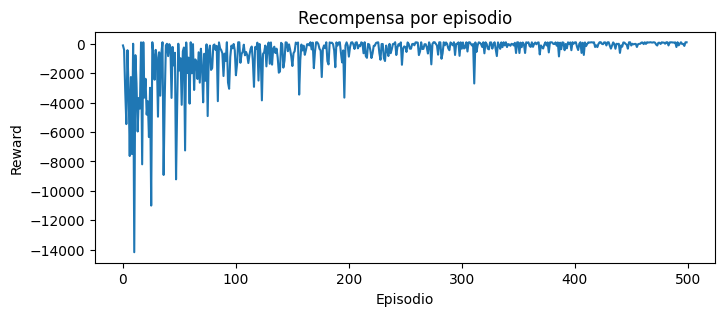

In [2]:
import gymnasium as gym
from gymnasium.wrappers import RecordVideo # <--- 1. Importar el wrapper
from mlvlab.agents.q_learning import QLearningAgent
import matplotlib.pyplot as plt

# Crear entorno base con render_mode="rgb_array"
env_base = gym.make("mlv/ant-v1", render_mode="rgb_array") 

# --- 2. Envolver el entorno para que grabe un vídeo ---
# Guardará un vídeo de los episodios 1, 8, 27, etc. (cubos de los enteros)
# en una carpeta llamada "videos/"
env = RecordVideo(env_base, video_folder="videos", episode_trigger=lambda e: e % 100 == 0)

GRID_SIZE = env.unwrapped.GRID_SIZE

# Adaptador manual
def obs_to_state(obs, grid_size):
    return int(obs[1]) * int(grid_size) + int(obs[0])

# 2) Crear agente
agent = QLearningAgent(
    observation_space=gym.spaces.Discrete(GRID_SIZE * GRID_SIZE),
    action_space=env.action_space,
    learning_rate=0.1,
    discount_factor=0.99,
)

# 3) Bucle de entrenamiento manual
num_episodes = 500 # Lo bajo para que no tarde tanto en el ejemplo
print("Iniciando entrenamiento...")

rewards = []
for episode in range(num_episodes):
    obs, info = env.reset()
    state = obs_to_state(obs, GRID_SIZE) # Asegúrate de tener esta función definida

    done = False
    total_reward = 0.0
    while not done:
        # IMPORTANTE: env.render() es llamado automáticamente por el wrapper
        # No necesitas llamarlo tú
        action = agent.act(state)
        next_obs, reward, terminated, truncated, info = env.step(action)
        next_state = obs_to_state(next_obs, GRID_SIZE)

        agent.learn(state, action, reward, next_state, terminated or truncated)
        state = next_state
        total_reward += reward
        done = terminated or truncated

    rewards.append(total_reward)
    if (episode + 1) % 100 == 0:
        print(f"Episodio {episode + 1}: Recompensa Total = {total_reward}")

print("Entrenamiento finalizado y vídeos guardados en la carpeta 'videos/'.")
env.close() # Importante cerrar para que el vídeo se guarde correctamente


# Mostrar el gráfico de recompensas como antes
plt.figure(figsize=(8,3))
plt.plot(rewards)
plt.title("Recompensa por episodio")
plt.xlabel("Episodio")
plt.ylabel("Reward")
plt.show()


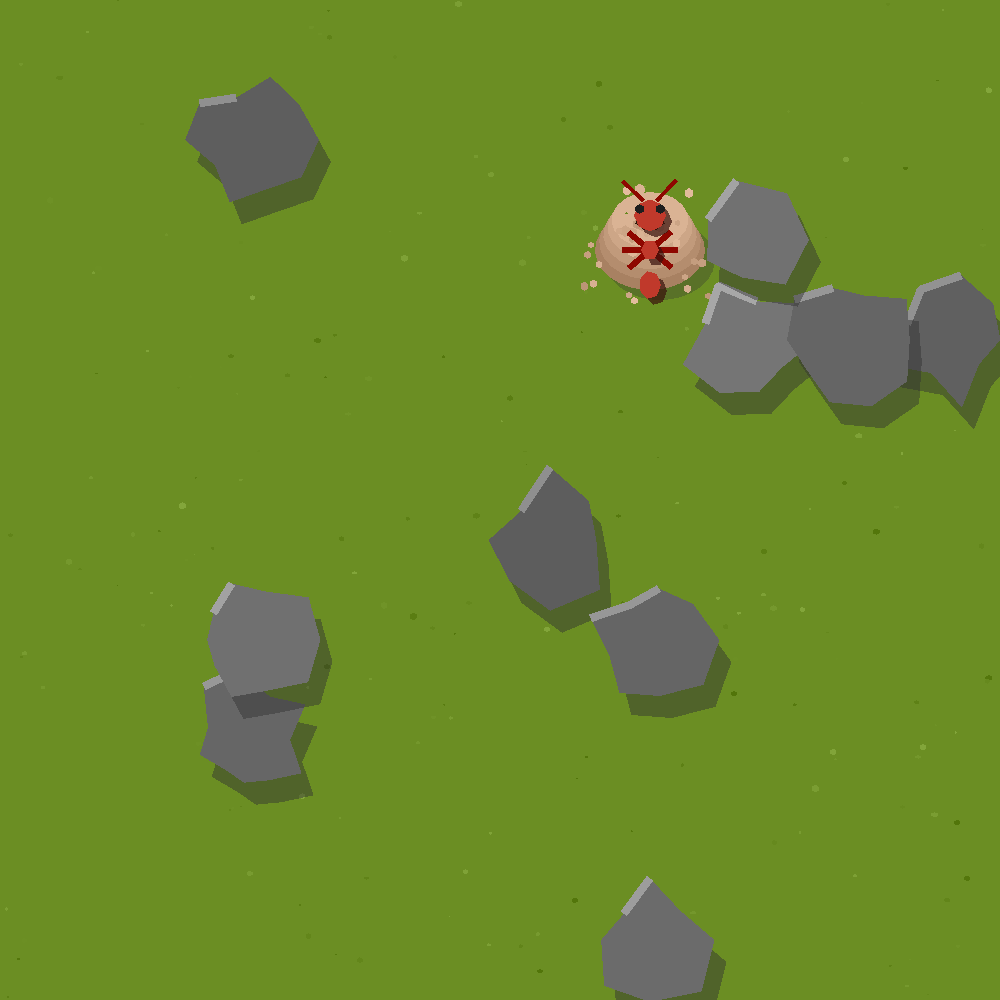


--- Animación Finalizada ---


In [54]:
# =============================================================================
# PASO 1: IMPORTACIONES Y CONFIGURACIÓN INICIAL
# =============================================================================
import gymnasium as gym
from mlvlab.agents.q_learning import QLearningAgent # Asegúrate que la ruta a tu agente es correcta
import matplotlib.pyplot as plt
import imageio
import numpy as np
import time

# Constante para la reproducibilidad del entorno
SEED = 12345

# =============================================================================
# PASO 2: OBTENER PROPIEDADES DEL ENTORNO Y DEFINIR HELPERS
# =============================================================================
# Creamos una instancia temporal del entorno solo para sacar sus propiedades
print("Obteniendo propiedades del entorno...")
env_props = gym.make("mlv/ant-v1")
GRID_SIZE = env_props.unwrapped.GRID_SIZE
OBSERVATION_SPACE = gym.spaces.Discrete(GRID_SIZE * GRID_SIZE)
ACTION_SPACE = env_props.action_space
env_props.close()
print("Propiedades obtenidas.")

# Función adaptadora de observación a estado
def obs_to_state(obs, grid_size):
    """Convierte una observación (x,y) a un estado discreto único."""
    return int(obs[1]) * int(grid_size) + int(obs[0])

# =============================================================================
# PASO 3: ENTRENAMIENTO DEL AGENTE
# =============================================================================
print("\n--- Iniciando Entrenamiento ---")

# Creamos el agente que vamos a entrenar
agent_trainer = QLearningAgent(
    observation_space=OBSERVATION_SPACE,
    action_space=ACTION_SPACE,
    learning_rate=0.1,
    discount_factor=0.99,
    epsilon_decay=0.999
)

# Creamos el entorno para el entrenamiento
env_train = gym.make("mlv/ant-v1")
num_episodes = 5000
all_rewards = []

# Usamos la semilla la primera vez que reseteamos el entorno de entrenamiento
obs, info = env_train.reset(seed=SEED)

for episode in range(num_episodes):
    state = obs_to_state(obs, GRID_SIZE)
    done = False
    
    while not done:
        action = agent_trainer.act(state)
        next_obs, reward, terminated, truncated, info = env_train.step(action)
        next_state = obs_to_state(next_obs, GRID_SIZE)
        
        agent_trainer.learn(state, action, reward, next_state, terminated or truncated)
        state = next_state
        done = terminated or truncated

    all_rewards.append(reward) # Guardamos la recompensa final del episodio
    
    if (episode + 1) % 500 == 0:
        print(f"Episodio {episode + 1}/{num_episodes} completado.")
    
    obs, info = env_train.reset()

print("--- Entrenamiento Finalizado ---")

# =============================================================================
# PASO 4: GUARDAR MODELO, LIBERAR RECURSOS Y VISUALIZAR RESULTADOS
# =============================================================================
AGENT_FILE_PATH = "ant_q_learning_agent.npy"
agent_trainer.save(AGENT_FILE_PATH)
env_train.close()

# Visualizamos la curva de aprendizaje para confirmar que el agente mejoró
print("\nMostrando curva de aprendizaje...")
avg_rewards = np.convolve(all_rewards, np.ones(100)/100, mode='valid')
plt.figure(figsize=(10, 4))
plt.plot(avg_rewards)
plt.title("Progreso del Aprendizaje (Recompensa Media Móvil)")
plt.xlabel("Episodios")
plt.ylabel("Recompensa Promedio")
plt.grid(True)
plt.show()

# =============================================================================
# PASO 5: Recopilar, Animar al 50% y Dejar Frame Fijo
# =============================================================================
import time
import io
import base64
from IPython.display import display, clear_output, HTML
from PIL import Image

# --- 1. CONFIGURACIÓN ---
print("Configurando el agente y el entorno...")
agent_eval = QLearningAgent(
    observation_space=OBSERVATION_SPACE,
    action_space=ACTION_SPACE
)
agent_eval.load(AGENT_FILE_PATH)
agent_eval.epsilon = 0.0

env = gym.make("mlv/ant-v1", render_mode="rgb_array")
frames = []

# --- 2. RECOPILACIÓN DE FRAMES DE LA PARTIDA ---
print("Ejecutando la simulación para recopilar los frames...")
obs, info = env.reset(seed=SEED)
done = False
while not done:
    frames.append(env.render())
    state = obs_to_state(obs, GRID_SIZE)
    action = agent_eval.act(state)
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    time.sleep(1/60)

# --- 3. TU SOLUCIÓN: GRABAR LA "ESCENA FINAL" ---
# El juego ha terminado, ahora grabamos durante 1 segundo (60 frames)
# para darle tiempo al renderer a completar sus animaciones de llegada.
print("Recopilando la animación de llegada...")
for _ in range(60):
    frames.append(env.render())
env.close()
print(f"Recopilación completa. Se han guardado {len(frames)} fotogramas.")
time.sleep(1)

# --- 4. ANIMACIÓN Y VISUALIZACIÓN FINAL ---
print("Mostrando animación completa...")

def mostrar_frame_con_ancho(frame, width_percent=50):
    img = Image.fromarray(frame)
    buffer = io.BytesIO()
    img.save(buffer, format='PNG')
    b64_string = base64.b64encode(buffer.getvalue()).decode('utf-8')
    html_code = f'<img src="data:image/png;base64,{b64_string}" style="width:{width_percent}%;" />'
    display(HTML(html_code))

try:
    for frame in frames:
        clear_output(wait=True)
        mostrar_frame_con_ancho(frame, width_percent=50)
        time.sleep(1/60)
except KeyboardInterrupt:
    print("\nAnimación interrumpida.")

print("\n--- Animación Finalizada ---")

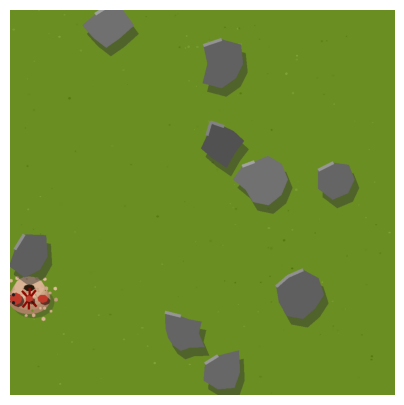

In [1]:
import gymnasium as gym
import mlvlab  # registra los entornos "mlv/..."
import matplotlib.pyplot as plt


env = gym.make("mlv/AntScout-v1", render_mode="rgb_array")
obs, info = env.reset(seed=42)
terminated = truncated = False
while not (terminated or truncated):
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)

last_frame = env.render()
env.close()

if last_frame is not None:
    plt.figure(figsize=(5, 5))
    plt.imshow(last_frame)
    plt.axis('off') # Para que no se vean los ejes
    plt.show()